**[DATA]** 
 
**DATA COLLECTION:**<br>
***Where did the data come from?*** : DeepMind Q&A Dataset (https://cs.nyu.edu/~kcho/DMQA/)<br>

**DATA MANAGEMENT:**<br>
***How did you clean and pre-process the data?***<br>
Text data is preprocessed involved following steps:
- Removing punctuations
- Removing stop words (words which do not add meaning at word level analysis)
- Lemmatization (converts different forms of a single word into one form)

***What recoding of the variables was done after the data was collected?***<br>
- The data essential contained 2 parts, story(text of a news article) and it's highlights.
- After loading the data, a pandas dataframe is created with 2 columns for story and highlights.
- For further analysis, all the story rows are preprocessed using the steps mentioned above and a column of word count of each story is added to the dataframe along with the cleaned stories.

***Was any of the data manipulated manually after it was collected?***<br>
- Data was preprocessed using pre-existing libraries and few manual preprocessing which we thought are necessary like removing text inside brackets.

**ANALYSIS:**<br>
- At the this stage of the project, we are using story highlights to compare our generated summaries.
- We are particularly focusing on word-level analysis.
- Implemented TF-IDF to look for unique words.
- A subset of 100 stories was taken for quick analysis.
- We used cosine similarity to check how similar the generated text is with highlights. Pretty descent score of about 80%(rough average) is observed on word-level summaries. For future work, we would like to improve this my implementing context based sentence ranking to rank high for relevant sentences in the story.

**ARGUMENT:**
- Highlights are a good low level summary for a news story but not a concrete summary. Through this project, we would like to implement a summary generation system which can provide optimum information in few sentence.

**[Design]**<br>

**STAKEHOLDER ANALYSIS:**<br>
- News articles have already been digitilized. This project can benifit 2 types of users, one who wants to consume a particle news story as quickly as possible and one who follows news through digital medium but also worries about staring at the screen for long time.
- Users with resources and ability to use internet to browse through news stories are benefitted through this applicaiton.

**CONTEXT:**<br>
- This project could be a sub-part for a digital news paper. Users will scroll through the User Interface of summaries of digital news paper stories. User can choose to continue reading by clicking on the article if the user wants to know more about the story after reading the summary.
- At this point we don't see any trust or privacy issues with this application because ulimately it the user who decides whether to continue reading the full story based on the summary provided.

**VISUALIZATION:**<br>

**ETHICS:**<br>
- One of the purposes of this project could be to save user's time. By looking at the summary, user can get a brief idea on the topic.
- Though modern NLP algorithms are performing better in understanding the context of a given text, they are far from understanding human intentions beind indirect speeches. This could result in inappropriate summary.
- For such reasons, it is advaisable to take the computer generated summaries with a grain of salt. The intention behind generating these summaries is to get a shorter form of original stories. At current level of the project, the sentences in the summary are selected from the original text.

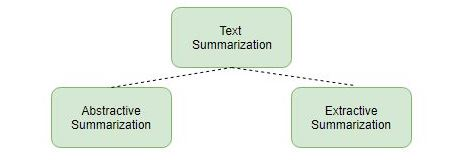

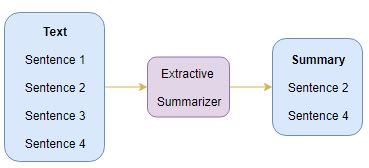

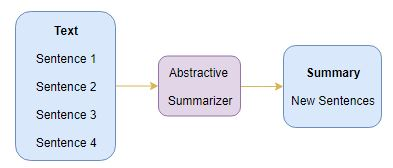

Reference: https://www.thesmartcube.com/ai-lab/experiments/7424/

[Data link]('https://cs.nyu.edu/~kcho/DMQA/')

Structure of CNN story:

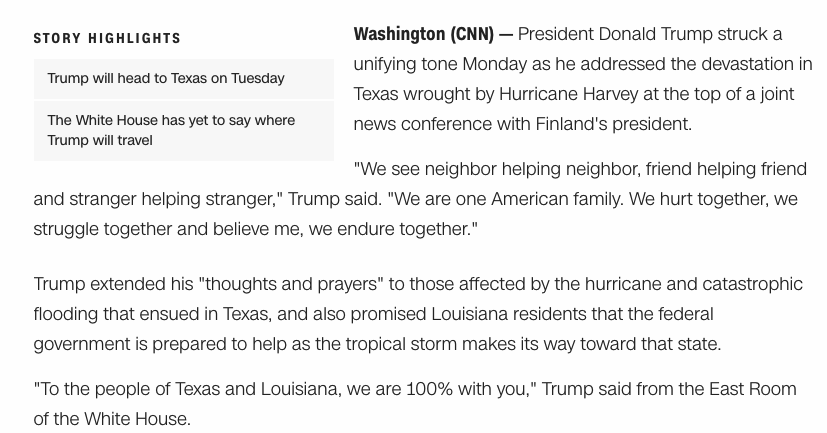

Data set contains both the story and story highlight

### Loading data

In [1]:
from os import listdir

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, encoding='utf-8')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# split a document into news story and highlights
def split_story(doc):
    # find first highlight
    index = doc.find('@highlight')
    # split into story and highlights
    story, highlights = doc[:index], doc[index:].split('@highlight')
    # strip extra white space around each highlight
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights
 
# load all stories in a directory
def load_stories(directory):
    stories = list()
    for name in listdir(directory):
        filename = directory + '/' + name
        # load document
        doc = load_doc(filename)
        # split into story and highlights
        story, highlights = split_story(doc)
        # store
        stories.append({'story':story, 'highlights':highlights})
    return stories
 
# load stories
directory = 'cnn/stories/'
stories = load_stories(directory)
print('Loaded Stories %d' % len(stories))


Loaded Stories 92579


In [3]:
import pandas as pd

stories_df = pd.DataFrame.from_dict(stories)
stories_df.head()


,story,highlights
0,At the start of a big week for the Higgs boson...,[U.S.-based scientists say their data points t...
1,(CNN)George Zimmerman -- acquitted by a Florid...,"[Zimmerman posts $5,000 bail; he was accused o..."
2,(CNN) -- Zlatan Ibrahimovic scored his third g...,[Barcelona move three points clear of Real Mad...
3,"(CNN) -- Nobel laureate Norman E. Borlaug, an ...",[Borlaug died at the age of 95 from complicati...
4,(CNN)Louisiana Gov. Bobby Jindal on Monday sto...,"[Louisiana Gov. Bobby Jindal decried ""no-go zo..."


In [4]:
subset_stories = stories_df
subset_stories.head()


,story,highlights
0,At the start of a big week for the Higgs boson...,[U.S.-based scientists say their data points t...
1,(CNN)George Zimmerman -- acquitted by a Florid...,"[Zimmerman posts $5,000 bail; he was accused o..."
2,(CNN) -- Zlatan Ibrahimovic scored his third g...,[Barcelona move three points clear of Real Mad...
3,"(CNN) -- Nobel laureate Norman E. Borlaug, an ...",[Borlaug died at the age of 95 from complicati...
4,(CNN)Louisiana Gov. Bobby Jindal on Monday sto...,"[Louisiana Gov. Bobby Jindal decried ""no-go zo..."


### Data Cleaning

In [5]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")


In [6]:
def remove_punctuation(text):
        punctuationfree="".join([i for i in text if i not in string.punctuation])
        return punctuationfree

def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    output= [i for i in text if i not in stopwords]
    return output

def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

def cleaned(text):

    rm_punc = remove_punctuation(text).replace('\n','').replace('.','').replace(',','').replace('\'','')\
                                            .replace(')','').replace('(','').replace('/','').lower().replace('cnn','')\
                                            .replace('--','').replace("'", '').replace("`", '')

    tokens = word_tokenize(rm_punc)

    stopWords = remove_stopwords(tokens)

    lemmatize = lemmatizer(stopWords)

    return lemmatize


In [7]:
subset_stories['cleaned_stories'] = 0
subset_stories['clean_sent'] = 0
subset_stories['joined_highlights'] = 0

for i in range(len(subset_stories)):
    
    subset_stories['cleaned_stories'][i] = pd.Series(cleaned([subset_stories['story'][i]]))
    subset_stories['clean_sent'][i] = pd.Series(" ".join([i for i in cleaned([subset_stories['story'][i]])]))
    subset_stories['joined_highlights'][i] = ". ".join([sent for sent in cleaned(subset_stories.highlights[i])])
    if i > 0:
        subset_stories['clean_sent'][i] = subset_stories.clean_sent[i][0]
# subset_stories['cleaned_stories'][0] = pd.Series(cleaned([subset_stories['story'][0]]))
subset_stories.head()


,story,highlights,cleaned_stories,clean_sent,joined_highlights
0,At the start of a big week for the Higgs boson...,[U.S.-based scientists say their data points t...,start,start big week higgs boson sought-after partic...,us-based. scientist. say. data. point. toward....
1,(CNN)George Zimmerman -- acquitted by a Florid...,"[Zimmerman posts $5,000 bail; he was accused o...",0 george 1 zimmerman 2 ...,george zimmerman acquitted florida jury death ...,zimmerman. post. $. 5000. bail. ;. accused. th...
2,(CNN) -- Zlatan Ibrahimovic scored his third g...,[Barcelona move three points clear of Real Mad...,0 zlatan 1 ibrahimovic 2 ...,zlatan ibrahimovic scored third goal many game...,barcelona. move. three. point. clear. real. ma...
3,"(CNN) -- Nobel laureate Norman E. Borlaug, an ...",[Borlaug died at the age of 95 from complicati...,0 nobel 1 laureate 2 ...,nobel laureate norman e borlaug agricultural s...,borlaug. died. age. 95. complication. caused. ...
4,(CNN)Louisiana Gov. Bobby Jindal on Monday sto...,"[Louisiana Gov. Bobby Jindal decried ""no-go zo...",0 louisiana 1 gov 2 b...,louisiana gov bobby jindal monday stood critic...,louisiana. gov. bobby. jindal. decried. ``. no...


In [8]:
subset_stories['counts'] = 0

for i in range(len(subset_stories)):
    word = pd.Series(subset_stories.cleaned_stories[i]).value_counts().keys().to_list()
    count = pd.Series(subset_stories.cleaned_stories[i]).value_counts().to_list()
    
    dic1 = dict(zip(word, count))
    
    subset_stories['counts'][i] = [dic1]

subset_stories.head()


,story,highlights,cleaned_stories,clean_sent,joined_highlights,counts
0,At the start of a big week for the Higgs boson...,[U.S.-based scientists say their data points t...,start,start big week higgs boson sought-after partic...,us-based. scientist. say. data. point. toward....,[{'start': 1}]
1,(CNN)George Zimmerman -- acquitted by a Florid...,"[Zimmerman posts $5,000 bail; he was accused o...",0 george 1 zimmerman 2 ...,george zimmerman acquitted florida jury death ...,zimmerman. post. $. 5000. bail. ;. accused. th...,"[{'''': 13, 'zimmerman': 12, 'said': 9, 'polic..."
2,(CNN) -- Zlatan Ibrahimovic scored his third g...,[Barcelona move three points clear of Real Mad...,0 zlatan 1 ibrahimovic 2 ...,zlatan ibrahimovic scored third goal many game...,barcelona. move. three. point. clear. real. ma...,"[{'minute': 7, 'goal': 6, 'point': 3, 'lead': ..."
3,"(CNN) -- Nobel laureate Norman E. Borlaug, an ...",[Borlaug died at the age of 95 from complicati...,0 nobel 1 laureate 2 ...,nobel laureate norman e borlaug agricultural s...,borlaug. died. age. 95. complication. caused. ...,"[{'university': 7, 'food': 4, 'borlaug': 4, ''..."
4,(CNN)Louisiana Gov. Bobby Jindal on Monday sto...,"[Louisiana Gov. Bobby Jindal decried ""no-go zo...",0 louisiana 1 gov 2 b...,louisiana gov bobby jindal monday stood critic...,louisiana. gov. bobby. jindal. decried. ``. no...,"[{'''': 40, '``': 23, 'jindal': 16, 'zone': 8,..."


In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

def sent_score(text):
    rm_punc = remove_punctuation(text).replace('\n','').replace('.','').replace(',','').replace('\'','')\
                                             .replace(')','').replace('(','').replace('/','').lower().replace('cnn','')\
                                            .replace('--','').replace("'", '').replace("`", '')
    stopWords = stopwords.words("english")
    words = word_tokenize(rm_punc)
    
    ## creating a dictionary for word frequencies
    freqTable = dict()
    for word in words:
        word = word.lower()
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1
            
    # creating a dictionary to keep the score of the sentence
    sentences = sent_tokenize(text)
    sentenceValue = dict()
    
    for sentence in sentences:
        for word, freq in freqTable.items():
            if word.lower() in sentence.lower():
                if sentence in sentenceValue:
                    sentenceValue[sentence] += freq
                else:
                    sentenceValue[sentence] = freq
                    
    sumValues = 0
    for sentence in sentenceValue:
        sumValues += sentenceValue[sentence]
        
    ## Average value of a sentence from original text
    try:
        average = int(sumValues / len(sentenceValue)+1)
    except:
        average = 0
    
    ## Storing sentence in to our summary
    summary = ''
    for sentence in sentences:
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.5*average)):
            summary += " " + sentence
            
    return summary


In [20]:
subset_stories['summary'] = 0
for i in range(len(subset_stories)):
    subset_stories['summary'][i] = sent_score(subset_stories['story'][i])

subset_stories.head()


,story,highlights,cleaned_stories,clean_sent,joined_highlights,counts,summary
0,At the start of a big week for the Higgs boson...,[U.S.-based scientists say their data points t...,start,start big week higgs boson sought-after partic...,us-based. scientist. say. data. point. toward....,[{'start': 1}],The scientists outlined their final analysis ...
1,(CNN)George Zimmerman -- acquitted by a Florid...,"[Zimmerman posts $5,000 bail; he was accused o...",0 george 1 zimmerman 2 ...,george zimmerman acquitted florida jury death ...,zimmerman. post. $. 5000. bail. ;. accused. th...,"[{'''': 13, 'zimmerman': 12, 'said': 9, 'polic...",(CNN)George Zimmerman -- acquitted by a Flori...
2,(CNN) -- Zlatan Ibrahimovic scored his third g...,[Barcelona move three points clear of Real Mad...,0 zlatan 1 ibrahimovic 2 ...,zlatan ibrahimovic scored third goal many game...,barcelona. move. three. point. clear. real. ma...,"[{'minute': 7, 'goal': 6, 'point': 3, 'lead': ...",The move worked as Ibrahimovic pounced to sco...
3,"(CNN) -- Nobel laureate Norman E. Borlaug, an ...",[Borlaug died at the age of 95 from complicati...,0 nobel 1 laureate 2 ...,nobel laureate norman e borlaug agricultural s...,borlaug. died. age. 95. complication. caused. ...,"[{'university': 7, 'food': 4, 'borlaug': 4, ''...","iReport.com: Tour Borlaug's boyhood farm\n\n""..."
4,(CNN)Louisiana Gov. Bobby Jindal on Monday sto...,"[Louisiana Gov. Bobby Jindal decried ""no-go zo...",0 louisiana 1 gov 2 b...,louisiana gov bobby jindal monday stood critic...,louisiana. gov. bobby. jindal. decried. ``. no...,"[{'''': 40, '``': 23, 'jindal': 16, 'zone': 8,...",Bobby Jindal on Monday stood by his criticism...


In [10]:
subset_stories.highlights[0]


['U.S.-based scientists say their data points toward the existence of the Higgs boson',
 'Finding the Higgs boson would help explain the origin of mass',
 "But the research at the Tevatron collider doesn't provide a conclusive answer",
 'Attention now turns to a seminar Wednesday on data from the Large Hadron Collider']

In [121]:
## Main story
subset_stories.story[13]


"(CNN) -- A single-engine airplane made an emergency landing on a California highway Sunday morning, though no major injuries were reported, authorities said.\n\nThe Piper Comanche 260 carrying a married couple landed on the southbound lanes of U.S. Highway 101.\n\nThe Piper Comanche 260 carrying a married couple landed on the southbound lanes of U.S. Highway 101 just outside Santa Barbara and a few miles from the airport, said California Highway Patrol spokesman Officer James Richards.\n\nThe plane's engine quit, and as the pilot descended, he lost control of the plane and landed in the southbound lane facing oncoming traffic. The plane struck two vehicles while landing, then spun and hit another one with its tail, Richards said.\n\nOne vehicle passenger was treated for minor injuries, he said. No other injuries were reported.\n\nThe landing happened at 10:36 a.m. (1:36 p.m. ET) and held up traffic for less than two hours, Richards said.\n\nHe added that the plane had departed Temecul

In [122]:
## Extractive Summary
subset_stories.summary[13]


' (CNN) -- A single-engine airplane made an emergency landing on a California highway Sunday morning, though no major injuries were reported, authorities said. The Piper Comanche 260 carrying a married couple landed on the southbound lanes of U.S. Highway 101 just outside Santa Barbara and a few miles from the airport, said California Highway Patrol spokesman Officer James Richards.'

In [123]:
## Abstractive Summary
subset_stories.summary2[13]

'<pad> the single-engine plane made an emergency landing on a California highway. no major injuries were reported. the pilot lost control of the plane and landed in the southbound lane facing oncoming traffic. the plane struck two vehicles while landing, then spun and hit another one with its tail. the landing happened at 10:36 a.m. (1:36 p.m. ET) and held up traffic for less than two hours, authorities say.</s>'

In [24]:
## https://github.com/adsieg/text_similarity/blob/master/Different%20Embeddings%20%2B%20Cosine%20Similarity%20%2B%20HeatMap%20illustration.ipynb
def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    #print('Similarity score of genereated summary and provided news highlights: ',round((cosine)*100,2),'%')
    return round((cosine)*100,2)

cosine_distance_countvectorizer_method(subset_stories.summary[99] , subset_stories.joined_highlights[99])


92.77

In [25]:
subset_stories['extractive_metric'] = 0
for i in range(len(subset_stories)):
    subset_stories['extractive_metric'][i] = cosine_distance_countvectorizer_method(subset_stories.summary[i],
                                                                                    subset_stories.joined_highlights[i])

subset_stories.head()

,story,highlights,cleaned_stories,clean_sent,joined_highlights,counts,summary,extractive_metric
0,At the start of a big week for the Higgs boson...,[U.S.-based scientists say their data points t...,start,start big week higgs boson sought-after partic...,us-based. scientist. say. data. point. toward....,[{'start': 1}],The scientists outlined their final analysis ...,85.02
1,(CNN)George Zimmerman -- acquitted by a Florid...,"[Zimmerman posts $5,000 bail; he was accused o...",0 george 1 zimmerman 2 ...,george zimmerman acquitted florida jury death ...,zimmerman. post. $. 5000. bail. ;. accused. th...,"[{'''': 13, 'zimmerman': 12, 'said': 9, 'polic...",(CNN)George Zimmerman -- acquitted by a Flori...,88.98
2,(CNN) -- Zlatan Ibrahimovic scored his third g...,[Barcelona move three points clear of Real Mad...,0 zlatan 1 ibrahimovic 2 ...,zlatan ibrahimovic scored third goal many game...,barcelona. move. three. point. clear. real. ma...,"[{'minute': 7, 'goal': 6, 'point': 3, 'lead': ...",The move worked as Ibrahimovic pounced to sco...,90.07
3,"(CNN) -- Nobel laureate Norman E. Borlaug, an ...",[Borlaug died at the age of 95 from complicati...,0 nobel 1 laureate 2 ...,nobel laureate norman e borlaug agricultural s...,borlaug. died. age. 95. complication. caused. ...,"[{'university': 7, 'food': 4, 'borlaug': 4, ''...","iReport.com: Tour Borlaug's boyhood farm\n\n""...",84.49
4,(CNN)Louisiana Gov. Bobby Jindal on Monday sto...,"[Louisiana Gov. Bobby Jindal decried ""no-go zo...",0 louisiana 1 gov 2 b...,louisiana gov bobby jindal monday stood critic...,louisiana. gov. bobby. jindal. decried. ``. no...,"[{'''': 40, '``': 23, 'jindal': 16, 'zone': 8,...",Bobby Jindal on Monday stood by his criticism...,80.67


In [26]:
subset_stories['extractive_metric'].mean()

78.7933626416358

In [ ]:
subset_stories.summary[50]

In [ ]:
## https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    N = len(docList)
    c = 0
    idfDict = dict.fromkeys(docList[0].keys(), 0)#; print(idfDict)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                if word in idfDict:
                    idfDict[word] += 1
                else:
#                     if word=='business':
#                         print("here")
                    idfDict[word] = 1
        c+=1
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        if float(val) == 0:
            print(val)
        
    return idfDict

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    c = 0
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
        if c==1:
            print(tfidf[word], val, idfs[word])
    
    return tfidf

In [ ]:
## computing TF
tfDoc = []
tfBow = 'tfBow{i}'
for i in range(len(subset_stories)):
    globals()[f"tfBow{i}"] = computeTF(subset_stories.counts[i][0], subset_stories.cleaned_stories)
    tfDoc.append(globals()[f"tfBow{i}"])

In [ ]:
## computing IDF
idfs=[]
for i in range(len(subset_stories)):
    idfs.append(subset_stories.counts[i][0])
idfs = computeIDF(idfs)
len(idfs)

In [ ]:
## computing TF-IDF
tfidfBow = []
for i in range(len(tfDoc)):
    tfidfBowA = computeTFIDF(tfDoc[i], idfs)
    tfidfBow.append(tfidfBowA)

In [ ]:
## Document-term frequency matrix
import pandas as pd
tfIdfmat = pd.DataFrame(tfidfBow).fillna(0)
print(len(tfIdfmat))
tfIdfmat.head()

In [ ]:
## finding top 10 unique words
unique_words = tfIdfmat.apply(lambda s, n: pd.Series(s.nlargest(n).index), axis=1, n=10)

In [ ]:
## top 10 unique words of first news article
unique_words.loc[0].values

## TF-IDF

In [ ]:
## creating a corpus of all the stories
corpus = []
for i in range(len(subset_stories)):
    corpus.append(subset_stories.clean_sent[i])
len(corpus)

In [ ]:
## creating a TF_IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

In [ ]:
## sorting the unique words based on it's weightage score
def Sort_Tuple(tup): 
    tup.sort(key = lambda x: x[1], reverse=True) 
    return tup 

## function to get unique words
def unqw(doc=None):
    ## returns unique words of all the documents in the corpus
    if doc==None:
        print("all docs")
        for i in range(len(corpus)):
            doc = i
            feature_index = tfidf_matrix[doc,:].nonzero()[1]
            tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])

            unq = []
            for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
                unq.append((w,s))

            sorted_tuple = Sort_Tuple(unq)
            return sorted_tuple
        
    ## returns unique words of selected document
    else:
        print("doc ",doc)
        doc = doc
        feature_index = tfidf_matrix[doc,:].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])

        unq = []
        for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
            unq.append((w,s))

        sorted_tuple = Sort_Tuple(unq)
        return sorted_tuple[:10]

In [ ]:
story1 = unqw(doc=0)
story2 = unqw(doc=1)
story3 = unqw(doc=2)
story4 = unqw(doc=3)

In [ ]:
def for_plot(t):
    key = []
    value = []

    for i in range(len(t)):
        key.append(t[i][0])
        value.append(t[i][1])
    return key, value

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(2, 2,figsize=(10,10))

names1, values1 = for_plot(story1)
ax[0,0].barh(range(len(names1)), values1, tick_label=names1)
ax[0,0].set_title("story 1")
plt.xlim([0, 1])

names2, values2 = for_plot(story2)
ax[0,1].barh(range(len(names2)), values2, tick_label=names2)
ax[0,1].set_title("story 2")
plt.xlim([0, 1])

names3, values3 = for_plot(story3)
ax[1,0].barh(range(len(names3)), values3, tick_label=names3)
ax[1,0].set_title("story 3")
plt.xlim([0, 1])

names4, values4 = for_plot(story4)
ax[1,1].barh(range(len(names4)), values4, tick_label=names4)
ax[1,1].set_title("story 4")
plt.xlim([0, 1])

for a in ax.flat:
    a.set(xlabel='weightage score')
fig.suptitle('Top 10 unique words')

plt.show()

In [ ]:
# ## cosine similarity between documents
# from sklearn.metrics.pairwise import cosine_similarity

# csim = cosine_similarity(tfIdfmat, tfIdfmat)
# pd.DataFrame(csim)

## T5 

Google’s T5(Text-To-Text Transfer Transformer): T5 is an encoder-decoder model pre-trained on a multi-task mixture of unsupervised and supervised tasks and for which each task is converted into a text-to-text format. <br>

***AutoModelWithLMHead*** is a generic model class that will be instantiated as one of the language modeling model classes of the library when created with the AutoModelWithLMHead.from_pretrained(pretrained_model_name_or_path) class method. <br>

***AutoTokenizer*** is a generic tokenizer class that will be instantiated as one of the tokenizer classes of the library when created with the AutoTokenizer.from_pretrained(pretrained_model_name_or_path) class method.


 - T5-small with 60 million parameters.
 - T5-base with 220 million parameters.
 - T5-large with 770 million parameters.
 -  T5-3B with 3 billion parameters.
 - T5-11B with 11 billion parameters.

#### About T5 Models
Google has released the pre-trained T5 text-to-text framework models which are trained on the unlabelled large text corpus called C4 (Colossal Clean Crawled Corpus) using deep learning. C4 is the web extract text of 800Gb cleaned data. The cleaning process involves deduplication, discarding incomplete sentences, and removing offensive or noisy content.

In [27]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead


In [28]:
tokenizer = AutoTokenizer.from_pretrained('t5-small')
model = AutoModelWithLMHead.from_pretrained('t5-small', return_dict=True)


In [ ]:
sequence = ("In May, Churchill was still generally unpopular with many Conservatives and probably most of the Labour Party. Chamberlain "
            "remained Conservative Party leader until October when ill health forced his resignation. By that time, Churchill had won the "
            "doubters over and his succession as party leader was a formality."
            " "
            "He began his premiership by forming a five-man war cabinet which included Chamberlain as Lord President of the Council, "
            "Labour leader Clement Attlee as Lord Privy Seal (later as Deputy Prime Minister), Halifax as Foreign Secretary and Labour's "
            "Arthur Greenwood as a minister without portfolio. In practice, these five were augmented by the service chiefs and ministers "
            "who attended the majority of meetings. The cabinet changed in size and membership as the war progressed, one of the key "
            "appointments being the leading trades unionist Ernest Bevin as Minister of Labour and National Service. In response to "
            "previous criticisms that there had been no clear single minister in charge of the prosecution of the war, Churchill created "
            "and took the additional position of Minister of Defence, making him the most powerful wartime Prime Minister in British "
            "history. He drafted outside experts into government to fulfil vital functions, especially on the Home Front. These included "
            "personal friends like Lord Beaverbrook and Frederick Lindemann, who became the government's scientific advisor."
            " "
            "At the end of May, with the British Expeditionary Force in retreat to Dunkirk and the Fall of France seemingly imminent, "
            "Halifax proposed that the government should explore the possibility of a negotiated peace settlement using the still-neutral "
            "Mussolini as an intermediary. There were several high-level meetings from 26 to 28 May, including two with the French "
            "premier Paul Reynaud. Churchill's resolve was to fight on, even if France capitulated, but his position remained precarious "
            "until Chamberlain resolved to support him. Churchill had the full support of the two Labour members but knew he could not "
            "survive as Prime Minister if both Chamberlain and Halifax were against him. In the end, by gaining the support of his outer "
            "cabinet, Churchill outmanoeuvred Halifax and won Chamberlain over. Churchill believed that the only option was to fight on "
            "and his use of rhetoric hardened public opinion against a peaceful resolution and prepared the British people for a long war "
            "– Jenkins says Churchill's speeches were 'an inspiration for the nation, and a catharsis for Churchill himself'."
            " "
            "His first speech as Prime Minister, delivered to the Commons on 13 May was the 'blood, toil, tears and sweat' speech. It was "
            "little more than a short statement but, Jenkins says, 'it included phrases which have reverberated down the decades'.")


In [29]:
subset_stories['summary2'] = 0
for i in range(len(subset_stories)):
    ## generating transformer based summaries
    sequence = subset_stories.story[i]
    inputs = tokenizer.encode("summarize: " + sequence,
                          return_tensors='pt',
                          max_length=512,
                          truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=80, length_penalty=5., num_beams=2)
    summary = tokenizer.decode(summary_ids[0])
    
    subset_stories['summary2'][i] = summary

subset_stories.head()


KeyboardInterrupt: 

In [74]:
subset_stories['abstractive_metric'] = 0
for i in range(len(subset_stories[:4908])):
    subset_stories['abstractive_metric'][i] = cosine_distance_countvectorizer_method(subset_stories.summary2[i].replace('<pad>','').replace('</s>',''),
                                                                                    subset_stories.joined_highlights[i])

subset_stories.head()


,story,highlights,cleaned_stories,clean_sent,joined_highlights,counts,summary,extractive_metric,summary2,abstractive_metric
0,At the start of a big week for the Higgs boson...,[U.S.-based scientists say their data points t...,start,start big week higgs boson sought-after partic...,us-based. scientist. say. data. point. toward....,[{'start': 1}],The scientists outlined their final analysis ...,85.02,<pad> the Higgs boson is the most sought-after...,82.52
1,(CNN)George Zimmerman -- acquitted by a Florid...,"[Zimmerman posts $5,000 bail; he was accused o...",0 george 1 zimmerman 2 ...,george zimmerman acquitted florida jury death ...,zimmerman. post. $. 5000. bail. ;. accused. th...,"[{'''': 13, 'zimmerman': 12, 'said': 9, 'polic...",(CNN)George Zimmerman -- acquitted by a Flori...,88.98,<pad> new: police say the arresting officer tr...,93.76
2,(CNN) -- Zlatan Ibrahimovic scored his third g...,[Barcelona move three points clear of Real Mad...,0 zlatan 1 ibrahimovic 2 ...,zlatan ibrahimovic scored third goal many game...,barcelona. move. three. point. clear. real. ma...,"[{'minute': 7, 'goal': 6, 'point': 3, 'lead': ...",The move worked as Ibrahimovic pounced to sco...,90.07,<pad> Zlatan Ibrahimovic scores his third goal...,64.88
3,"(CNN) -- Nobel laureate Norman E. Borlaug, an ...",[Borlaug died at the age of 95 from complicati...,0 nobel 1 laureate 2 ...,nobel laureate norman e borlaug agricultural s...,borlaug. died. age. 95. complication. caused. ...,"[{'university': 7, 'food': 4, 'borlaug': 4, ''...","iReport.com: Tour Borlaug's boyhood farm\n\n""...",84.49,<pad> Norman Borlaug died from cancer complica...,79.00
4,(CNN)Louisiana Gov. Bobby Jindal on Monday sto...,"[Louisiana Gov. Bobby Jindal decried ""no-go zo...",0 louisiana 1 gov 2 b...,louisiana gov bobby jindal monday stood critic...,louisiana. gov. bobby. jindal. decried. ``. no...,"[{'''': 40, '``': 23, 'jindal': 16, 'zone': 8,...",Bobby Jindal on Monday stood by his criticism...,80.67,"<pad> ""you've got people who want to come to o...",96.43


In [75]:
subset_stories['extractive_metric'][:4000].mean(), subset_stories['abstractive_metric'][:4000].mean()

(78.5695, 83.1887925)

(array([ 237.,    0.,    0.,    0.,    4.,   64.,  337., 1232., 2119.,
         915.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

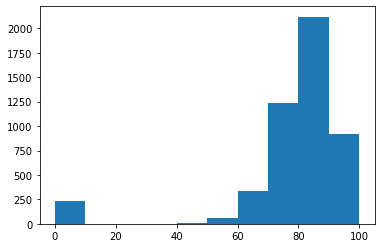

In [69]:
import matplotlib.pyplot as plt
plt.hist(subset_stories['extractive_metric'][:4908])

In [72]:
import scipy
scipy.stats.iqr(subset_stories['extractive_metric'][:4908])

12.779999999999987

(array([   3.,   14.,   30.,  127.,  268.,  546.,  977., 1221., 1115.,
         607.]),
 array([ 39.31 ,  45.379,  51.448,  57.517,  63.586,  69.655,  75.724,
         81.793,  87.862,  93.931, 100.   ]),
 <BarContainer object of 10 artists>)

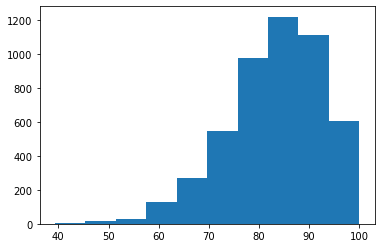

In [70]:
plt.hist(subset_stories['abstractive_metric'][:4908])

In [73]:
scipy.stats.iqr(subset_stories['abstractive_metric'][:4908])

12.765

In [78]:
!pip install git+https://github.com/tagucci/pythonrouge.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Cloning https://github.com/tagucci/pythonrouge.git to /private/var/folders/0g/dxphtzkd3736fft04gn__yt00000gn/T/pip-req-build-g4gw2ci6
  Running command git clone --filter=blob:none -q https://github.com/tagucci/pythonrouge.git /private/var/folders/0g/dxphtzkd3736fft04gn__yt00000gn/T/pip-req-build-g4gw2ci6
  Resolved https://github.com/tagucci/pythonrouge.git to commit 0f1603dbc089ecb0fb40fdd3a28576e9f3d36769
  Preparing metadata (setup.py) ... done
You should consider upgrading via the '/Users/hk/miniforge3/envs/Apple_silicon/bin/python3 -m pip install --upgrade pip' command.


In [105]:
# !apt-get install -y cpanminus

# !cpanm --force XML::Parser

In [87]:
from rouge import Rouge
rouge = Rouge()
rouge.get_scores(subset_stories.summary2[:4908], subset_stories.joined_highlights[:4908], avg=True)

{'rouge-1': {'r': 0.17662326044531934,
  'p': 0.09826045670448193,
  'f': 0.12360674616297067},
 'rouge-2': {'r': 0.027677727702267705,
  'p': 0.013016896779947504,
  'f': 0.01732127507614296},
 'rouge-l': {'r': 0.17662326044531934,
  'p': 0.09826045670448193,
  'f': 0.12360674616297067}}

In [142]:
rouge.get_scores(subset_stories.summary2[:15], subset_stories.joined_highlights[:15], avg=True)

{'rouge-1': {'r': 0.19118195399654672,
  'p': 0.10311541770237867,
  'f': 0.13258766183504414},
 'rouge-2': {'r': 0.03823175247110339,
  'p': 0.017170704539125593,
  'f': 0.023447508718413727},
 'rouge-l': {'r': 0.19118195399654672,
  'p': 0.10311541770237867,
  'f': 0.13258766183504414}}

In [143]:
rouge.get_scores(subset_stories.summary[:15], subset_stories.joined_highlights[:15], avg=True)

{'rouge-1': {'r': 0.21405122042153527,
  'p': 0.05488855326779748,
  'f': 0.08202732434127326},
 'rouge-2': {'r': 0.02927461810220431,
  'p': 0.0085977111485225,
  'f': 0.012067158101346787},
 'rouge-l': {'r': 0.21405122042153527,
  'p': 0.05488855326779748,
  'f': 0.08202732434127326}}

from pythonrouge.pythonrouge import Pythonrouge

summary = subset_stories.summary2[i].replace('<pad>','').replace('</s>','')
reference = subset_stories.joined_highlights[i]

rouge = Pythonrouge(summary_file_exist=False,

                    summary=summary, reference=reference,

                    n_gram=2, ROUGE_SU4=True, ROUGE_L=True,ROUGE_W=True,ROUGE_W_Weight=1.2,

                    recall_only=False, stemming=True, stopwords=True,

                    word_level=True, length_limit=True, length=80,

                    use_cf=False, cf=95, scoring_formula='average',

                    resampling=True, samples=1000, favor=True, p=0.5)

score = rouge.calc_score()

print(score)

In [64]:
subset_stories.to_csv('final_df.csv')

In [78]:
sequence = subset_stories.story[99]


In [79]:
inputs = tokenizer.encode("summarize: " + sequence,
                          return_tensors='pt',
                          max_length=512,
                          truncation=True)


In [80]:
summary_ids = model.generate(inputs, max_length=150, min_length=80, length_penalty=5., num_beams=2)


In [81]:
summary = tokenizer.decode(summary_ids[0])
summary


'<pad> a judge has decided the government must intervene to ensure it behaves itself. the government has vowed to clean up its act before, only to end up back where it started. the news of the world possibly intercepted voicemail messages left on a cell phone. it emerged the practice of phone hacking had been widespread at the paper. a judge has ruled that the government should pass a law giving ofcom power to approve a new regulatory system that will be independent of the newspaper industry.</s>'

In [82]:
s = summary.replace('<pad>','').replace('</s>','')


In [83]:
cosine_distance_countvectorizer_method(s , subset_stories.joined_highlights[1])


Similarity score of genereated summary and provided news highlights:  100.0 %


<center><h2>Performance Evaluation Metrics</h2></center>

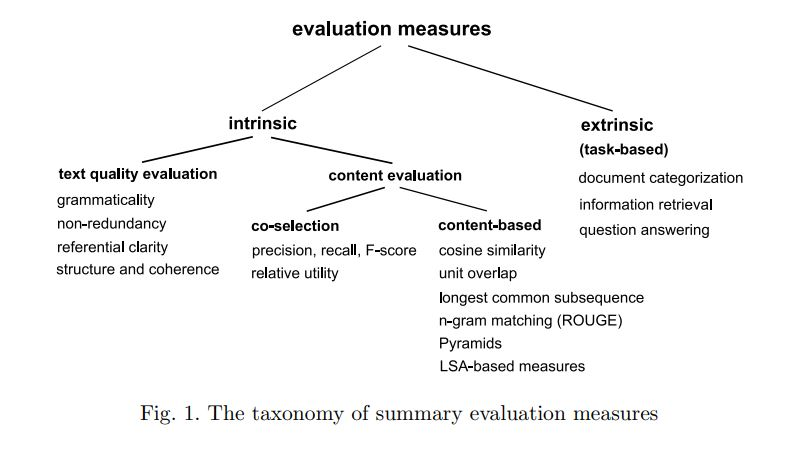

https://towardsdatascience.com/transformers-explained-65454c0f3fa7
